# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold                #Provides train/test indices to split data in train/test sets
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from numpy import linalg
#from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
#SciPy optimize provides functions for minimizing (or maximizing) objective functions, 
#possibly subject to constraints. It includes solvers for nonlinear problems 
#(with support for both local and global optimization algorithms), 
#linear programing, constrained and nonlinear least-squares, root finding, and curve fitting.
import scipy.optimize as sco  
from itertools import cycle, islice  
#Iterator is defined as object types which contains values that can be accessed or iterated using a loop
from scipy import sparse
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from sklearn.neighbors import kneighbors_graph
#!pip install -q datascience                                         
#Package that is required by pandas profiling
#!pip install -q pandas-profiling 
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
start_time = time.time()

In [3]:
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp  # Importing library for scientific calculations

import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import time

In [4]:
df = pd.read_csv("obesity_chi2.csv")

In [5]:
df.sample(10)

,IDRSAge,Hlba1c,IDRSWithBMI,Age,IDRSWithBMIWC,IDRS,Weight,DiabetesSelfDecl,DiabetesCalc
3453,0,4.50000,4,32,5,4,52,1,1
665,1,4.70000,5,35,6,6,56,1,1
2110,1,5.50000,6,47,7,7,59,1,1
6303,2,8.20000,8,67,9,8,75,0,0
1892,2,6.90000,8,60,8,6,75,1,0
3527,1,6.50000,7,48,8,7,70,1,0
573,1,11.90000,8,42,9,8,75,1,0
3437,1,6.00000,7,46,8,7,70,1,2
3615,2,9.90000,9,62,10,8,60,1,0
314,2,6.60000,8,57,9,8,76,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDRSAge           7495 non-null   int64  
 1   Hlba1c            7495 non-null   float64
 2   IDRSWithBMI       7495 non-null   int64  
 3   Age               7495 non-null   int64  
 4   IDRSWithBMIWC     7495 non-null   int64  
 5   IDRS              7495 non-null   int64  
 6   Weight            7495 non-null   int64  
 7   DiabetesSelfDecl  7495 non-null   int64  
 8   DiabetesCalc      7495 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 527.1 KB


# Data Preprocessing

In [7]:
# dropping ALL duplicate values
df.drop_duplicates(keep = False, inplace = True)

In [8]:
df = df.dropna(axis=0)

In [9]:
x=df.drop(['DiabetesCalc','Hlba1c','DiabetesSelfDecl'],axis=1)
y=df['DiabetesCalc']

In [10]:
np.any(np.isnan(y))

False

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
X_train,X_Val,y_train,y_Val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

In [13]:
in_dim = x.shape[1]

In [14]:
in_dim

6

In [15]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():    
    model = Sequential()
    model.add(Dense(8, input_dim = in_dim, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(20, input_dim = 8, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(24, input_dim = 12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, input_dim = 20, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001) # initial value 0.01,0.0034
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100, 200]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)



In [18]:
# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10, return_train_score=True)
#grid_results = grid.fit(X_train, y_train)
grid_results = grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
Epoch 1/10
377/377 [==============================] - 2s 2ms/step - loss: 0.3952 - accuracy: 0.4669
Epoch 2/10
377/377 [==============================] - 1s 2ms/step - loss: 0.2833 - accuracy: 0.4669
Epoch 3/10
377/377 [==============================] - 1s 2ms/step - loss: 0.2756 - accuracy: 0.4669
Epoch 4/10
377/377 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.4669
Epoch 5/10
377/377 [==============================] - 1s 2ms/step - loss: 0.2705 - accuracy: 0.4669
Epoch 6/10
377/377 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.4669
Epoch 7/10
377/377 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.4669
Epoch 8/10
377/377 [==============================] - 1s 2ms/step - loss: 0.2603 - accuracy: 0.4669
Epoch 9/10
377/377 [==============================] - 1s 2

377/377 [==============================] - 1s 3ms/step - loss: 0.2591 - accuracy: 0.4669
Epoch 14/50
377/377 [==============================] - 1s 3ms/step - loss: 0.2574 - accuracy: 0.4669
Epoch 15/50
377/377 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.4669
Epoch 16/50
377/377 [==============================] - 1s 3ms/step - loss: 0.2556 - accuracy: 0.4669
Epoch 17/50
377/377 [==============================] - 1s 3ms/step - loss: 0.2556 - accuracy: 0.4669
Epoch 18/50
377/377 [==============================] - 1s 3ms/step - loss: 0.2527 - accuracy: 0.4669
Epoch 19/50
377/377 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.4669
Epoch 20/50
377/377 [==============================] - 1s 2ms/step - loss: 0.2490 - accuracy: 0.4669
Epoch 21/50
377/377 [==============================] - 1s 2ms/step - loss: 0.2525 - accuracy: 0.4669
Epoch 22/50
377/377 [==============================] - 1s 2ms/step - loss: 0.2485 - accuracy: 0.4669
Ep

377/377 [==============================] - 1s 3ms/step - loss: -23.0818 - accuracy: 0.4712
Epoch 41/50
377/377 [==============================] - 1s 3ms/step - loss: -25.4444 - accuracy: 0.4712
Epoch 42/50
377/377 [==============================] - 1s 3ms/step - loss: -28.1066 - accuracy: 0.4712
Epoch 43/50
377/377 [==============================] - 1s 3ms/step - loss: -31.3790 - accuracy: 0.4712
Epoch 44/50
377/377 [==============================] - 1s 3ms/step - loss: -34.3261 - accuracy: 0.4712
Epoch 45/50
377/377 [==============================] - 1s 3ms/step - loss: -37.5668 - accuracy: 0.4712
Epoch 46/50
377/377 [==============================] - 1s 3ms/step - loss: -40.8482 - accuracy: 0.4712
Epoch 47/50
377/377 [==============================] - 1s 3ms/step - loss: -44.8984 - accuracy: 0.4712
Epoch 48/50
377/377 [==============================] - 1s 3ms/step - loss: -48.9497 - accuracy: 0.4712
Epoch 49/50
377/377 [==============================] - 1s 3ms/step - loss: -53.0532 -

377/377 [==============================] - 1s 3ms/step - loss: 0.1765 - accuracy: 0.4733
Epoch 14/50
377/377 [==============================] - 1s 3ms/step - loss: 0.1638 - accuracy: 0.4733
Epoch 15/50
377/377 [==============================] - 1s 3ms/step - loss: 0.1502 - accuracy: 0.4733
Epoch 16/50
377/377 [==============================] - 1s 3ms/step - loss: 0.1418 - accuracy: 0.4733
Epoch 17/50
377/377 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.4733
Epoch 18/50
377/377 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.4733
Epoch 19/50
377/377 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.4733
Epoch 20/50
377/377 [==============================] - 1s 3ms/step - loss: 0.0519 - accuracy: 0.4733
Epoch 21/50
377/377 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.4733
Epoch 22/50
377/377 [==============================] - 1s 3ms/step - loss: -0.0282 - accuracy: 0.4733
E

377/377 [==============================] - 1s 3ms/step - loss: -22.2799 - accuracy: 0.4596
Epoch 41/50
377/377 [==============================] - 1s 3ms/step - loss: -24.8715 - accuracy: 0.4596
Epoch 42/50
377/377 [==============================] - 1s 3ms/step - loss: -26.9651 - accuracy: 0.4596
Epoch 43/50
377/377 [==============================] - 1s 3ms/step - loss: -29.9906 - accuracy: 0.4596
Epoch 44/50
377/377 [==============================] - 1s 3ms/step - loss: -32.0299 - accuracy: 0.4596
Epoch 45/50
377/377 [==============================] - 1s 3ms/step - loss: -35.2711 - accuracy: 0.4596
Epoch 46/50
377/377 [==============================] - 1s 3ms/step - loss: -38.4492 - accuracy: 0.4596
Epoch 47/50
377/377 [==============================] - 1s 3ms/step - loss: -41.3524 - accuracy: 0.4596
Epoch 48/50
377/377 [==============================] - 1s 3ms/step - loss: -44.4473 - accuracy: 0.4596
Epoch 49/50
377/377 [==============================] - 1s 3ms/step - loss: -48.6954 -

377/377 [==============================] - 1s 3ms/step - loss: 0.1912 - accuracy: 0.4706
Epoch 67/100
377/377 [==============================] - 1s 3ms/step - loss: 0.1938 - accuracy: 0.4698
Epoch 68/100
377/377 [==============================] - 1s 3ms/step - loss: 0.1941 - accuracy: 0.4733
Epoch 69/100
377/377 [==============================] - 1s 3ms/step - loss: 0.1843 - accuracy: 0.4712
Epoch 70/100
377/377 [==============================] - 1s 3ms/step - loss: 0.1801 - accuracy: 0.4736
Epoch 71/100
377/377 [==============================] - 1s 2ms/step - loss: 0.1851 - accuracy: 0.4720
Epoch 72/100
377/377 [==============================] - 1s 3ms/step - loss: 0.1757 - accuracy: 0.4704
Epoch 73/100
377/377 [==============================] - 1s 3ms/step - loss: 0.1748 - accuracy: 0.4717
Epoch 74/100
377/377 [==============================] - 1s 3ms/step - loss: 0.1714 - accuracy: 0.4709
Epoch 75/100
377/377 [==============================] - 1s 3ms/step - loss: 0.1708 - accuracy: 

377/377 [==============================] - 1s 3ms/step - loss: -22.8155 - accuracy: 0.4712
Epoch 43/100
377/377 [==============================] - 1s 3ms/step - loss: -25.0751 - accuracy: 0.4712
Epoch 44/100
377/377 [==============================] - 1s 3ms/step - loss: -27.1415 - accuracy: 0.4712
Epoch 45/100
377/377 [==============================] - 1s 3ms/step - loss: -29.4599 - accuracy: 0.4712
Epoch 46/100
377/377 [==============================] - 1s 3ms/step - loss: -31.8045 - accuracy: 0.4712
Epoch 47/100
377/377 [==============================] - 1s 3ms/step - loss: -34.7394 - accuracy: 0.4712
Epoch 48/100
377/377 [==============================] - 1s 3ms/step - loss: -37.8498 - accuracy: 0.4712
Epoch 49/100
377/377 [==============================] - 1s 3ms/step - loss: -41.1552 - accuracy: 0.4712
Epoch 50/100
377/377 [==============================] - 1s 3ms/step - loss: -44.1922 - accuracy: 0.4712
Epoch 51/100
377/377 [==============================] - 1s 3ms/step - loss: -

377/377 [==============================] - 1s 3ms/step - loss: -5.6424 - accuracy: 0.4674
Epoch 18/100
377/377 [==============================] - 1s 3ms/step - loss: -7.1143 - accuracy: 0.4674
Epoch 19/100
377/377 [==============================] - 1s 3ms/step - loss: -8.7107 - accuracy: 0.4674
Epoch 20/100
377/377 [==============================] - 1s 3ms/step - loss: -10.4416 - accuracy: 0.4674
Epoch 21/100
377/377 [==============================] - 1s 3ms/step - loss: -12.8791 - accuracy: 0.4674
Epoch 22/100
377/377 [==============================] - 1s 3ms/step - loss: -15.4246 - accuracy: 0.4674
Epoch 23/100
377/377 [==============================] - 1s 3ms/step - loss: -18.0350 - accuracy: 0.4674
Epoch 24/100
377/377 [==============================] - 1s 3ms/step - loss: -21.3097 - accuracy: 0.4674
Epoch 25/100
377/377 [==============================] - 1s 3ms/step - loss: -24.8945 - accuracy: 0.4674
Epoch 26/100
377/377 [==============================] - 1s 3ms/step - loss: -29.

377/377 [==============================] - 1s 3ms/step - loss: -3563.8232 - accuracy: 0.4674
Epoch 96/100
377/377 [==============================] - 1s 3ms/step - loss: -3711.9707 - accuracy: 0.4674
Epoch 97/100
377/377 [==============================] - 1s 3ms/step - loss: -3855.6450 - accuracy: 0.4674
Epoch 98/100
377/377 [==============================] - 1s 3ms/step - loss: -4014.8862 - accuracy: 0.4674
Epoch 99/100
377/377 [==============================] - 1s 3ms/step - loss: -4165.9844 - accuracy: 0.4674
Epoch 100/100
377/377 [==============================] - 1s 1ms/step - loss: -4424.1377 - accuracy: 0.4674
[CV 3/5; 3/12] END batch_size=10, epochs=100;, score=(train=0.467, test=0.469) total time= 1.7min
[CV 4/5; 3/12] START batch_size=10, epochs=100..................................
Epoch 1/100
377/377 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.4730
Epoch 2/100
377/377 [==============================] - 1s 3ms/step - loss: 0.2470 - accuracy: 0.

377/377 [==============================] - 1s 3ms/step - loss: -67.7228 - accuracy: 0.4733
Epoch 72/100
377/377 [==============================] - 1s 3ms/step - loss: -72.9465 - accuracy: 0.4733
Epoch 73/100
377/377 [==============================] - 1s 3ms/step - loss: -77.5385 - accuracy: 0.4733
Epoch 74/100
377/377 [==============================] - 1s 3ms/step - loss: -83.2256 - accuracy: 0.4733
Epoch 75/100
377/377 [==============================] - 1s 3ms/step - loss: -88.7912 - accuracy: 0.4733
Epoch 76/100
377/377 [==============================] - 1s 3ms/step - loss: -94.1807 - accuracy: 0.4733
Epoch 77/100
377/377 [==============================] - 1s 3ms/step - loss: -99.6085 - accuracy: 0.4733
Epoch 78/100
377/377 [==============================] - 1s 3ms/step - loss: -105.8455 - accuracy: 0.4733
Epoch 79/100
377/377 [==============================] - 1s 3ms/step - loss: -113.0452 - accuracy: 0.4733
Epoch 80/100
377/377 [==============================] - 1s 3ms/step - loss:

377/377 [==============================] - 1s 3ms/step - loss: -52.2843 - accuracy: 0.4596
Epoch 47/100
377/377 [==============================] - 1s 3ms/step - loss: -56.2179 - accuracy: 0.4596
Epoch 48/100
377/377 [==============================] - 1s 3ms/step - loss: -61.4578 - accuracy: 0.4596
Epoch 49/100
377/377 [==============================] - 1s 3ms/step - loss: -67.4139 - accuracy: 0.4596
Epoch 50/100
377/377 [==============================] - 1s 3ms/step - loss: -72.3819 - accuracy: 0.4596
Epoch 51/100
377/377 [==============================] - 1s 3ms/step - loss: -79.8023 - accuracy: 0.4596
Epoch 52/100
377/377 [==============================] - 1s 3ms/step - loss: -86.0054 - accuracy: 0.4596
Epoch 53/100
377/377 [==============================] - 1s 3ms/step - loss: -91.7586 - accuracy: 0.4596
Epoch 54/100
377/377 [==============================] - 1s 3ms/step - loss: -99.9366 - accuracy: 0.4596
Epoch 55/100
377/377 [==============================] - 1s 3ms/step - loss: -

377/377 [==============================] - 1s 3ms/step - loss: 0.2459 - accuracy: 0.4669
Epoch 22/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.4669
Epoch 23/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2430 - accuracy: 0.4669
Epoch 24/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2393 - accuracy: 0.4669
Epoch 25/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2442 - accuracy: 0.4669
Epoch 26/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2385 - accuracy: 0.4669
Epoch 27/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2381 - accuracy: 0.4669
Epoch 28/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.4669
Epoch 29/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2351 - accuracy: 0.4669
Epoch 30/200
377/377 [==============================] - 1s 3ms/step - loss: 0.2343 - accuracy: 

377/377 [==============================] - 1s 3ms/step - loss: -0.8423 - accuracy: 0.4669
Epoch 102/200
377/377 [==============================] - 1s 3ms/step - loss: -0.8631 - accuracy: 0.4669
Epoch 103/200
377/377 [==============================] - 1s 3ms/step - loss: -0.9255 - accuracy: 0.4669
Epoch 104/200
377/377 [==============================] - 1s 3ms/step - loss: -0.9998 - accuracy: 0.4669
Epoch 105/200
377/377 [==============================] - 1s 3ms/step - loss: -1.1351 - accuracy: 0.4669
Epoch 106/200
377/377 [==============================] - 1s 3ms/step - loss: -1.1145 - accuracy: 0.4669
Epoch 107/200
377/377 [==============================] - 1s 3ms/step - loss: -1.2609 - accuracy: 0.4669
Epoch 108/200
377/377 [==============================] - 1s 3ms/step - loss: -1.3635 - accuracy: 0.4669
Epoch 109/200
377/377 [==============================] - 1s 3ms/step - loss: -1.4689 - accuracy: 0.4669
Epoch 110/200
377/377 [==============================] - 1s 3ms/step - loss: -

377/377 [==============================] - 1s 3ms/step - loss: -28.0457 - accuracy: 0.4669
Epoch 180/200
377/377 [==============================] - 1s 3ms/step - loss: -28.7694 - accuracy: 0.4669
Epoch 181/200
377/377 [==============================] - 1s 3ms/step - loss: -29.9473 - accuracy: 0.4669
Epoch 182/200
377/377 [==============================] - 1s 3ms/step - loss: -30.9564 - accuracy: 0.4669
Epoch 183/200
377/377 [==============================] - 1s 3ms/step - loss: -31.0998 - accuracy: 0.4669
Epoch 184/200
377/377 [==============================] - 1s 3ms/step - loss: -32.2794 - accuracy: 0.4669
Epoch 185/200
377/377 [==============================] - 1s 3ms/step - loss: -33.4119 - accuracy: 0.4669
Epoch 186/200
377/377 [==============================] - 1s 3ms/step - loss: -34.8545 - accuracy: 0.4669
Epoch 187/200
377/377 [==============================] - 1s 3ms/step - loss: -35.5161 - accuracy: 0.4669
Epoch 188/200
377/377 [==============================] - 1s 3ms/step 

377/377 [==============================] - 1s 3ms/step - loss: -50.5294 - accuracy: 0.4712
Epoch 55/200
377/377 [==============================] - 1s 3ms/step - loss: -53.8721 - accuracy: 0.4712
Epoch 56/200
377/377 [==============================] - 1s 3ms/step - loss: -58.6039 - accuracy: 0.4712
Epoch 57/200
377/377 [==============================] - 1s 3ms/step - loss: -62.6322 - accuracy: 0.4712
Epoch 58/200
377/377 [==============================] - 1s 3ms/step - loss: -67.6147 - accuracy: 0.4712
Epoch 59/200
377/377 [==============================] - 1s 3ms/step - loss: -72.8025 - accuracy: 0.4712
Epoch 60/200
377/377 [==============================] - 1s 3ms/step - loss: -78.4275 - accuracy: 0.4712
Epoch 61/200
377/377 [==============================] - 1s 3ms/step - loss: -83.5720 - accuracy: 0.4712
Epoch 62/200
377/377 [==============================] - 1s 3ms/step - loss: -89.3348 - accuracy: 0.4712
Epoch 63/200
377/377 [==============================] - 1s 3ms/step - loss: -

377/377 [==============================] - 1s 3ms/step - loss: -1862.9199 - accuracy: 0.4712
Epoch 132/200
377/377 [==============================] - 1s 3ms/step - loss: -1926.6276 - accuracy: 0.4712
Epoch 133/200
377/377 [==============================] - 1s 3ms/step - loss: -1988.6100 - accuracy: 0.4712
Epoch 134/200
377/377 [==============================] - 1s 3ms/step - loss: -2046.6920 - accuracy: 0.4712
Epoch 135/200
377/377 [==============================] - 1s 3ms/step - loss: -2110.9280 - accuracy: 0.4712
Epoch 136/200
377/377 [==============================] - 1s 3ms/step - loss: -2174.4414 - accuracy: 0.4712
Epoch 137/200
377/377 [==============================] - 1s 3ms/step - loss: -2238.7981 - accuracy: 0.4712
Epoch 138/200
377/377 [==============================] - 1s 3ms/step - loss: -2304.8347 - accuracy: 0.4712
Epoch 139/200
377/377 [==============================] - 1s 3ms/step - loss: -2369.2527 - accuracy: 0.4712
Epoch 140/200
377/377 [============================

377/377 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.4674
Epoch 5/200
377/377 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.4674
Epoch 6/200
377/377 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.4674
Epoch 7/200
377/377 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.4674
Epoch 8/200
377/377 [==============================] - 1s 3ms/step - loss: -0.0482 - accuracy: 0.4674
Epoch 9/200
377/377 [==============================] - 1s 3ms/step - loss: -0.1504 - accuracy: 0.4674
Epoch 10/200
377/377 [==============================] - 1s 3ms/step - loss: -0.2949 - accuracy: 0.4674
Epoch 11/200
377/377 [==============================] - 1s 3ms/step - loss: -0.4684 - accuracy: 0.4674
Epoch 12/200
377/377 [==============================] - 1s 3ms/step - loss: -0.7385 - accuracy: 0.4674
Epoch 13/200
377/377 [==============================] - 1s 3ms/step - loss: -1.0340 - accuracy:

377/377 [==============================] - 1s 3ms/step - loss: -1007.0092 - accuracy: 0.4674
Epoch 83/200
377/377 [==============================] - 1s 3ms/step - loss: -1055.0016 - accuracy: 0.4674
Epoch 84/200
377/377 [==============================] - 1s 3ms/step - loss: -1100.2325 - accuracy: 0.4674
Epoch 85/200
377/377 [==============================] - 1s 3ms/step - loss: -1151.5237 - accuracy: 0.4674
Epoch 86/200
377/377 [==============================] - 1s 3ms/step - loss: -1204.4264 - accuracy: 0.4674
Epoch 87/200
377/377 [==============================] - 1s 3ms/step - loss: -1255.1453 - accuracy: 0.4674
Epoch 88/200
377/377 [==============================] - 1s 3ms/step - loss: -1306.7692 - accuracy: 0.4674
Epoch 89/200
377/377 [==============================] - 1s 3ms/step - loss: -1363.8569 - accuracy: 0.4674
Epoch 90/200
377/377 [==============================] - 1s 3ms/step - loss: -1417.5829 - accuracy: 0.4674
Epoch 91/200
377/377 [==============================] - 1s 

377/377 [==============================] - 1s 3ms/step - loss: -11438.2793 - accuracy: 0.4674
Epoch 159/200
377/377 [==============================] - 1s 3ms/step - loss: -11719.1504 - accuracy: 0.4674
Epoch 160/200
377/377 [==============================] - 1s 3ms/step - loss: -11994.8896 - accuracy: 0.4674
Epoch 161/200
377/377 [==============================] - 1s 2ms/step - loss: -12268.9014 - accuracy: 0.4674
Epoch 162/200
377/377 [==============================] - 1s 2ms/step - loss: -12563.3506 - accuracy: 0.4674
Epoch 163/200
377/377 [==============================] - 1s 2ms/step - loss: -12844.7119 - accuracy: 0.4674
Epoch 164/200
377/377 [==============================] - 1s 3ms/step - loss: -13163.0645 - accuracy: 0.4674
Epoch 165/200
377/377 [==============================] - 1s 3ms/step - loss: -13497.4873 - accuracy: 0.4674
Epoch 166/200
377/377 [==============================] - 1s 3ms/step - loss: -13783.1836 - accuracy: 0.4674
Epoch 167/200
377/377 [===================

377/377 [==============================] - 1s 3ms/step - loss: -0.8979 - accuracy: 0.4733
Epoch 33/200
377/377 [==============================] - 1s 3ms/step - loss: -1.1015 - accuracy: 0.4733
Epoch 34/200
377/377 [==============================] - 1s 3ms/step - loss: -1.2873 - accuracy: 0.4733
Epoch 35/200
377/377 [==============================] - 1s 3ms/step - loss: -1.5022 - accuracy: 0.4733
Epoch 36/200
377/377 [==============================] - 1s 3ms/step - loss: -1.7832 - accuracy: 0.4733
Epoch 37/200
377/377 [==============================] - 1s 3ms/step - loss: -2.0076 - accuracy: 0.4733
Epoch 38/200
377/377 [==============================] - 1s 3ms/step - loss: -2.3343 - accuracy: 0.4733
Epoch 39/200
377/377 [==============================] - 1s 3ms/step - loss: -2.6730 - accuracy: 0.4733
Epoch 40/200
377/377 [==============================] - 1s 3ms/step - loss: -3.0125 - accuracy: 0.4733
Epoch 41/200
377/377 [==============================] - 1s 3ms/step - loss: -3.5140 - 

377/377 [==============================] - 1s 3ms/step - loss: -334.5861 - accuracy: 0.4733
Epoch 111/200
377/377 [==============================] - 1s 3ms/step - loss: -347.5570 - accuracy: 0.4733
Epoch 112/200
377/377 [==============================] - 1s 3ms/step - loss: -361.2556 - accuracy: 0.4733
Epoch 113/200
377/377 [==============================] - 1s 3ms/step - loss: -374.9904 - accuracy: 0.4733
Epoch 114/200
377/377 [==============================] - 1s 3ms/step - loss: -387.4535 - accuracy: 0.4733
Epoch 115/200
377/377 [==============================] - 1s 3ms/step - loss: -404.3281 - accuracy: 0.4733
Epoch 116/200
377/377 [==============================] - 1s 3ms/step - loss: -421.0327 - accuracy: 0.4733
Epoch 117/200
377/377 [==============================] - 1s 3ms/step - loss: -434.3104 - accuracy: 0.4733
Epoch 118/200
377/377 [==============================] - 1s 3ms/step - loss: -452.2059 - accuracy: 0.4733
Epoch 119/200
377/377 [==============================] - 1s 

377/377 [==============================] - 1s 3ms/step - loss: -3125.9954 - accuracy: 0.4733
Epoch 188/200
377/377 [==============================] - 1s 3ms/step - loss: -3193.0520 - accuracy: 0.4733
Epoch 189/200
377/377 [==============================] - 1s 3ms/step - loss: -3263.3733 - accuracy: 0.4733
Epoch 190/200
377/377 [==============================] - 1s 3ms/step - loss: -3341.3274 - accuracy: 0.4733
Epoch 191/200
377/377 [==============================] - 1s 3ms/step - loss: -3409.5603 - accuracy: 0.4733
Epoch 192/200
377/377 [==============================] - 1s 3ms/step - loss: -3486.0571 - accuracy: 0.4733
Epoch 193/200
377/377 [==============================] - 1s 3ms/step - loss: -3546.7322 - accuracy: 0.4733
Epoch 194/200
377/377 [==============================] - 1s 3ms/step - loss: -3620.5215 - accuracy: 0.4733
Epoch 195/200
377/377 [==============================] - 1s 3ms/step - loss: -3708.5593 - accuracy: 0.4733
Epoch 196/200
377/377 [============================

377/377 [==============================] - 1s 3ms/step - loss: -69.8188 - accuracy: 0.4596
Epoch 63/200
377/377 [==============================] - 1s 3ms/step - loss: -74.1585 - accuracy: 0.4596
Epoch 64/200
377/377 [==============================] - 1s 3ms/step - loss: -79.2527 - accuracy: 0.4596
Epoch 65/200
377/377 [==============================] - 1s 3ms/step - loss: -83.3697 - accuracy: 0.4596
Epoch 66/200
377/377 [==============================] - 1s 3ms/step - loss: -89.7113 - accuracy: 0.4596
Epoch 67/200
377/377 [==============================] - 1s 3ms/step - loss: -95.0838 - accuracy: 0.4596
Epoch 68/200
377/377 [==============================] - 1s 3ms/step - loss: -100.0596 - accuracy: 0.4596
Epoch 69/200
377/377 [==============================] - 1s 3ms/step - loss: -105.0763 - accuracy: 0.4596
Epoch 70/200
377/377 [==============================] - 1s 3ms/step - loss: -111.9164 - accuracy: 0.4596
Epoch 71/200
377/377 [==============================] - 1s 3ms/step - loss

377/377 [==============================] - 1s 3ms/step - loss: -1604.0457 - accuracy: 0.4596
Epoch 140/200
377/377 [==============================] - 1s 3ms/step - loss: -1646.1749 - accuracy: 0.4596
Epoch 141/200
377/377 [==============================] - 1s 3ms/step - loss: -1699.0576 - accuracy: 0.4596
Epoch 142/200
377/377 [==============================] - 1s 3ms/step - loss: -1746.0873 - accuracy: 0.4596
Epoch 143/200
377/377 [==============================] - 1s 3ms/step - loss: -1792.3718 - accuracy: 0.4596
Epoch 144/200
377/377 [==============================] - 1s 3ms/step - loss: -1836.3002 - accuracy: 0.4596
Epoch 145/200
377/377 [==============================] - 1s 3ms/step - loss: -1888.5166 - accuracy: 0.4596
Epoch 146/200
377/377 [==============================] - 1s 3ms/step - loss: -1935.4716 - accuracy: 0.4596
Epoch 147/200
377/377 [==============================] - 1s 3ms/step - loss: -1978.4260 - accuracy: 0.4596
Epoch 148/200
377/377 [============================

Epoch 1/10
189/189 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.4712
Epoch 2/10
189/189 [==============================] - 1s 3ms/step - loss: 0.2347 - accuracy: 0.4712
Epoch 3/10
189/189 [==============================] - 1s 3ms/step - loss: 0.2186 - accuracy: 0.4712
Epoch 4/10
189/189 [==============================] - 1s 3ms/step - loss: 0.2020 - accuracy: 0.4712
Epoch 5/10
189/189 [==============================] - 1s 3ms/step - loss: 0.1866 - accuracy: 0.4712
Epoch 6/10
189/189 [==============================] - 1s 3ms/step - loss: 0.1635 - accuracy: 0.4712
Epoch 7/10
189/189 [==============================] - 1s 3ms/step - loss: 0.1482 - accuracy: 0.4712
Epoch 8/10
189/189 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.4712
Epoch 9/10
189/189 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.4712
Epoch 10/10
189/189 [==============================] - 0s 2ms/step - loss: -0.0157 - accuracy: 0.471

189/189 [==============================] - 1s 3ms/step - loss: 0.2494 - accuracy: 0.4669
Epoch 29/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2488 - accuracy: 0.4669
Epoch 30/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.4669
Epoch 31/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.4669
Epoch 32/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2448 - accuracy: 0.4669
Epoch 33/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2469 - accuracy: 0.4669
Epoch 34/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2456 - accuracy: 0.4669
Epoch 35/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2438 - accuracy: 0.4669
Epoch 36/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.4669
Epoch 37/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2437 - accuracy: 0.4669
Ep

Epoch 2/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2249 - accuracy: 0.4674
Epoch 3/50
189/189 [==============================] - 1s 3ms/step - loss: 0.2012 - accuracy: 0.4674
Epoch 4/50
189/189 [==============================] - 1s 3ms/step - loss: 0.1817 - accuracy: 0.4674
Epoch 5/50
189/189 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.4674
Epoch 6/50
189/189 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.4674
Epoch 7/50
189/189 [==============================] - 1s 3ms/step - loss: 0.1295 - accuracy: 0.4674
Epoch 8/50
189/189 [==============================] - 1s 3ms/step - loss: 0.1005 - accuracy: 0.4674
Epoch 9/50
189/189 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.4674
Epoch 10/50
189/189 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.4674
Epoch 11/50
189/189 [==============================] - 1s 3ms/step - loss: -0.0117 - accuracy: 0.46

189/189 [==============================] - 1s 3ms/step - loss: -0.0635 - accuracy: 0.4733
Epoch 30/50
189/189 [==============================] - 1s 3ms/step - loss: -0.1071 - accuracy: 0.4733
Epoch 31/50
189/189 [==============================] - 1s 3ms/step - loss: -0.1503 - accuracy: 0.4733
Epoch 32/50
189/189 [==============================] - 1s 3ms/step - loss: -0.2068 - accuracy: 0.4733
Epoch 33/50
189/189 [==============================] - 1s 3ms/step - loss: -0.2547 - accuracy: 0.4733
Epoch 34/50
189/189 [==============================] - 1s 3ms/step - loss: -0.3093 - accuracy: 0.4733
Epoch 35/50
189/189 [==============================] - 1s 3ms/step - loss: -0.3937 - accuracy: 0.4733
Epoch 36/50
189/189 [==============================] - 1s 3ms/step - loss: -0.4785 - accuracy: 0.4733
Epoch 37/50
189/189 [==============================] - 1s 3ms/step - loss: -0.5953 - accuracy: 0.4733
Epoch 38/50
189/189 [==============================] - 1s 3ms/step - loss: -0.6586 - accuracy:

189/189 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.4669
Epoch 3/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.4669
Epoch 4/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2758 - accuracy: 0.4669
Epoch 5/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2736 - accuracy: 0.4669
Epoch 6/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.4669
Epoch 7/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2720 - accuracy: 0.4669
Epoch 8/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2687 - accuracy: 0.4669
Epoch 9/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2661 - accuracy: 0.4669
Epoch 10/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2640 - accuracy: 0.4669
Epoch 11/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2640 - accuracy: 0.4669


189/189 [==============================] - 1s 3ms/step - loss: 0.2157 - accuracy: 0.4685
Epoch 83/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2185 - accuracy: 0.4720
Epoch 84/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2160 - accuracy: 0.4709
Epoch 85/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2142 - accuracy: 0.4706
Epoch 86/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2134 - accuracy: 0.4704
Epoch 87/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2125 - accuracy: 0.4712
Epoch 88/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2122 - accuracy: 0.4728
Epoch 89/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.4704
Epoch 90/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2099 - accuracy: 0.4706
Epoch 91/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2103 - accuracy: 

189/189 [==============================] - 1s 3ms/step - loss: -32.6764 - accuracy: 0.4712
Epoch 59/100
189/189 [==============================] - 1s 3ms/step - loss: -34.8329 - accuracy: 0.4712
Epoch 60/100
189/189 [==============================] - 1s 3ms/step - loss: -37.6783 - accuracy: 0.4712
Epoch 61/100
189/189 [==============================] - 1s 3ms/step - loss: -40.1147 - accuracy: 0.4712
Epoch 62/100
189/189 [==============================] - 1s 3ms/step - loss: -43.0403 - accuracy: 0.4712
Epoch 63/100
189/189 [==============================] - 1s 3ms/step - loss: -45.2744 - accuracy: 0.4712
Epoch 64/100
189/189 [==============================] - 1s 3ms/step - loss: -48.4592 - accuracy: 0.4712
Epoch 65/100
189/189 [==============================] - 1s 3ms/step - loss: -51.6147 - accuracy: 0.4712
Epoch 66/100
189/189 [==============================] - 1s 3ms/step - loss: -55.2859 - accuracy: 0.4712
Epoch 67/100
189/189 [==============================] - 1s 3ms/step - loss: -

189/189 [==============================] - 1s 3ms/step - loss: -19.3644 - accuracy: 0.4674
Epoch 34/100
189/189 [==============================] - 1s 3ms/step - loss: -21.7776 - accuracy: 0.4674
Epoch 35/100
189/189 [==============================] - 1s 3ms/step - loss: -23.9872 - accuracy: 0.4674
Epoch 36/100
189/189 [==============================] - 1s 3ms/step - loss: -26.3336 - accuracy: 0.4674
Epoch 37/100
189/189 [==============================] - 1s 3ms/step - loss: -29.0967 - accuracy: 0.4674
Epoch 38/100
189/189 [==============================] - 1s 3ms/step - loss: -31.6425 - accuracy: 0.4674
Epoch 39/100
189/189 [==============================] - 1s 3ms/step - loss: -34.1830 - accuracy: 0.4674
Epoch 40/100
189/189 [==============================] - 1s 3ms/step - loss: -37.7957 - accuracy: 0.4674
Epoch 41/100
189/189 [==============================] - 1s 3ms/step - loss: -41.7126 - accuracy: 0.4674
Epoch 42/100
189/189 [==============================] - 1s 3ms/step - loss: -

189/189 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.4733
Epoch 9/100
189/189 [==============================] - 1s 3ms/step - loss: 0.2028 - accuracy: 0.4733
Epoch 10/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1954 - accuracy: 0.4733
Epoch 11/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1868 - accuracy: 0.4733
Epoch 12/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1735 - accuracy: 0.4733
Epoch 13/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1618 - accuracy: 0.4733
Epoch 14/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1485 - accuracy: 0.4733
Epoch 15/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1323 - accuracy: 0.4733
Epoch 16/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1118 - accuracy: 0.4733
Epoch 17/100
189/189 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0

189/189 [==============================] - 1s 3ms/step - loss: -124.7344 - accuracy: 0.4733
Epoch 88/100
189/189 [==============================] - 1s 3ms/step - loss: -130.1164 - accuracy: 0.4733
Epoch 89/100
189/189 [==============================] - 1s 3ms/step - loss: -137.7120 - accuracy: 0.4733
Epoch 90/100
189/189 [==============================] - 1s 3ms/step - loss: -143.1053 - accuracy: 0.4733
Epoch 91/100
189/189 [==============================] - 1s 3ms/step - loss: -150.4728 - accuracy: 0.4733
Epoch 92/100
189/189 [==============================] - 1s 3ms/step - loss: -158.7363 - accuracy: 0.4733
Epoch 93/100
189/189 [==============================] - 1s 3ms/step - loss: -162.1172 - accuracy: 0.4733
Epoch 94/100
189/189 [==============================] - 1s 3ms/step - loss: -172.8342 - accuracy: 0.4733
Epoch 95/100
189/189 [==============================] - 1s 3ms/step - loss: -181.2875 - accuracy: 0.4733
Epoch 96/100
189/189 [==============================] - 1s 3ms/step 

189/189 [==============================] - 1s 3ms/step - loss: -26.0229 - accuracy: 0.4596
Epoch 64/100
189/189 [==============================] - 1s 3ms/step - loss: -27.7380 - accuracy: 0.4596
Epoch 65/100
189/189 [==============================] - 1s 3ms/step - loss: -29.4151 - accuracy: 0.4596
Epoch 66/100
189/189 [==============================] - 1s 3ms/step - loss: -31.0777 - accuracy: 0.4596
Epoch 67/100
189/189 [==============================] - 1s 3ms/step - loss: -32.2934 - accuracy: 0.4596
Epoch 68/100
189/189 [==============================] - 1s 3ms/step - loss: -34.6872 - accuracy: 0.4596
Epoch 69/100
189/189 [==============================] - 1s 3ms/step - loss: -37.1985 - accuracy: 0.4596
Epoch 70/100
189/189 [==============================] - 1s 3ms/step - loss: -39.1235 - accuracy: 0.4596
Epoch 71/100
189/189 [==============================] - 1s 3ms/step - loss: -41.3157 - accuracy: 0.4596
Epoch 72/100
189/189 [==============================] - 1s 3ms/step - loss: -

189/189 [==============================] - 1s 3ms/step - loss: 0.2449 - accuracy: 0.4669
Epoch 40/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2470 - accuracy: 0.4669
Epoch 41/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2432 - accuracy: 0.4669
Epoch 42/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2422 - accuracy: 0.4669
Epoch 43/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2421 - accuracy: 0.4669
Epoch 44/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2445 - accuracy: 0.4669
Epoch 45/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2413 - accuracy: 0.4669
Epoch 46/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2422 - accuracy: 0.4669
Epoch 47/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.4669
Epoch 48/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2391 - accuracy: 

189/189 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.4669
Epoch 120/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1663 - accuracy: 0.4669
Epoch 121/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1638 - accuracy: 0.4669
Epoch 122/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1696 - accuracy: 0.4669
Epoch 123/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1620 - accuracy: 0.4669
Epoch 124/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1539 - accuracy: 0.4669
Epoch 125/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1552 - accuracy: 0.4669
Epoch 126/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1483 - accuracy: 0.4669
Epoch 127/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1477 - accuracy: 0.4669
Epoch 128/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1414 - a

189/189 [==============================] - 1s 3ms/step - loss: -0.9795 - accuracy: 0.4669
Epoch 199/200
189/189 [==============================] - 1s 3ms/step - loss: -1.0413 - accuracy: 0.4669
Epoch 200/200
189/189 [==============================] - 0s 2ms/step - loss: -1.2284 - accuracy: 0.4669
[CV 1/5; 8/12] END batch_size=20, epochs=200;, score=(train=0.467, test=0.471) total time= 1.8min
[CV 2/5; 8/12] START batch_size=20, epochs=200..................................
Epoch 1/200
189/189 [==============================] - 1s 3ms/step - loss: 0.4220 - accuracy: 0.4712
Epoch 2/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.4712
Epoch 3/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2135 - accuracy: 0.4712
Epoch 4/200
189/189 [==============================] - 1s 3ms/step - loss: 0.2042 - accuracy: 0.4712
Epoch 5/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1866 - accuracy: 0.4712
Epoch 6/200
189/18

Epoch 74/200
189/189 [==============================] - 1s 3ms/step - loss: -136.0567 - accuracy: 0.4712
Epoch 75/200
189/189 [==============================] - 1s 3ms/step - loss: -143.1607 - accuracy: 0.4712
Epoch 76/200
189/189 [==============================] - 1s 3ms/step - loss: -150.9101 - accuracy: 0.4712
Epoch 77/200
189/189 [==============================] - 1s 3ms/step - loss: -159.7075 - accuracy: 0.4712
Epoch 78/200
189/189 [==============================] - 1s 3ms/step - loss: -166.2319 - accuracy: 0.4712
Epoch 79/200
189/189 [==============================] - 1s 3ms/step - loss: -174.4125 - accuracy: 0.4712
Epoch 80/200
189/189 [==============================] - 1s 3ms/step - loss: -183.1372 - accuracy: 0.4712
Epoch 81/200
189/189 [==============================] - 1s 3ms/step - loss: -191.1707 - accuracy: 0.4712
Epoch 82/200
189/189 [==============================] - 1s 3ms/step - loss: -200.7211 - accuracy: 0.4712
Epoch 83/200
189/189 [==============================] -

189/189 [==============================] - 1s 3ms/step - loss: -2017.7002 - accuracy: 0.4712
Epoch 152/200
189/189 [==============================] - 1s 3ms/step - loss: -2057.0310 - accuracy: 0.4712
Epoch 153/200
189/189 [==============================] - 1s 3ms/step - loss: -2107.9822 - accuracy: 0.4712
Epoch 154/200
189/189 [==============================] - 1s 3ms/step - loss: -2158.6873 - accuracy: 0.4712
Epoch 155/200
189/189 [==============================] - 1s 3ms/step - loss: -2207.8862 - accuracy: 0.4712
Epoch 156/200
189/189 [==============================] - 1s 3ms/step - loss: -2260.1948 - accuracy: 0.4712
Epoch 157/200
189/189 [==============================] - 1s 3ms/step - loss: -2318.5793 - accuracy: 0.4712
Epoch 158/200
189/189 [==============================] - 1s 3ms/step - loss: -2376.9966 - accuracy: 0.4712
Epoch 159/200
189/189 [==============================] - 1s 3ms/step - loss: -2426.9346 - accuracy: 0.4712
Epoch 160/200
189/189 [============================

189/189 [==============================] - 1s 3ms/step - loss: -5.2186 - accuracy: 0.4674
Epoch 26/200
189/189 [==============================] - 1s 3ms/step - loss: -6.1433 - accuracy: 0.4674
Epoch 27/200
189/189 [==============================] - 1s 3ms/step - loss: -6.9555 - accuracy: 0.4674
Epoch 28/200
189/189 [==============================] - 1s 3ms/step - loss: -8.0038 - accuracy: 0.4674
Epoch 29/200
189/189 [==============================] - 1s 3ms/step - loss: -8.9295 - accuracy: 0.4674
Epoch 30/200
189/189 [==============================] - 1s 3ms/step - loss: -10.3141 - accuracy: 0.4674
Epoch 31/200
189/189 [==============================] - 1s 3ms/step - loss: -11.8014 - accuracy: 0.4674
Epoch 32/200
189/189 [==============================] - 1s 3ms/step - loss: -13.1318 - accuracy: 0.4674
Epoch 33/200
189/189 [==============================] - 1s 3ms/step - loss: -14.7470 - accuracy: 0.4674
Epoch 34/200
189/189 [==============================] - 1s 3ms/step - loss: -16.50

189/189 [==============================] - 1s 3ms/step - loss: -904.6605 - accuracy: 0.4674
Epoch 104/200
189/189 [==============================] - 1s 3ms/step - loss: -938.0844 - accuracy: 0.4674
Epoch 105/200
189/189 [==============================] - 1s 3ms/step - loss: -971.8618 - accuracy: 0.4674
Epoch 106/200
189/189 [==============================] - 1s 3ms/step - loss: -1014.2213 - accuracy: 0.4674
Epoch 107/200
189/189 [==============================] - 1s 3ms/step - loss: -1047.1049 - accuracy: 0.4674
Epoch 108/200
189/189 [==============================] - 1s 3ms/step - loss: -1086.3380 - accuracy: 0.4674
Epoch 109/200
189/189 [==============================] - 1s 3ms/step - loss: -1115.4105 - accuracy: 0.4674
Epoch 110/200
189/189 [==============================] - 1s 3ms/step - loss: -1164.5990 - accuracy: 0.4674
Epoch 111/200
189/189 [==============================] - 1s 3ms/step - loss: -1198.5303 - accuracy: 0.4674
Epoch 112/200
189/189 [==============================]

189/189 [==============================] - 1s 3ms/step - loss: -7076.8853 - accuracy: 0.4677
Epoch 180/200
189/189 [==============================] - 1s 3ms/step - loss: -7225.1108 - accuracy: 0.4674
Epoch 181/200
189/189 [==============================] - 1s 3ms/step - loss: -7386.8403 - accuracy: 0.4677
Epoch 182/200
189/189 [==============================] - 1s 3ms/step - loss: -7534.8843 - accuracy: 0.4674
Epoch 183/200
189/189 [==============================] - 1s 3ms/step - loss: -7690.5996 - accuracy: 0.4680
Epoch 184/200
189/189 [==============================] - 1s 3ms/step - loss: -7847.4487 - accuracy: 0.4674
Epoch 185/200
189/189 [==============================] - 1s 3ms/step - loss: -8009.1885 - accuracy: 0.4674
Epoch 186/200
189/189 [==============================] - 1s 3ms/step - loss: -8168.7832 - accuracy: 0.4680
Epoch 187/200
189/189 [==============================] - 1s 3ms/step - loss: -8334.6260 - accuracy: 0.4682
Epoch 188/200
189/189 [============================

189/189 [==============================] - 1s 3ms/step - loss: -22.4824 - accuracy: 0.4733
Epoch 55/200
189/189 [==============================] - 1s 3ms/step - loss: -24.2087 - accuracy: 0.4733
Epoch 56/200
189/189 [==============================] - 1s 3ms/step - loss: -26.6826 - accuracy: 0.4733
Epoch 57/200
189/189 [==============================] - 1s 3ms/step - loss: -28.9683 - accuracy: 0.4733
Epoch 58/200
189/189 [==============================] - 1s 3ms/step - loss: -31.2709 - accuracy: 0.4733
Epoch 59/200
189/189 [==============================] - 1s 3ms/step - loss: -33.8874 - accuracy: 0.4733
Epoch 60/200
189/189 [==============================] - 1s 3ms/step - loss: -36.6137 - accuracy: 0.4733
Epoch 61/200
189/189 [==============================] - 1s 3ms/step - loss: -38.8619 - accuracy: 0.4733
Epoch 62/200
189/189 [==============================] - 1s 3ms/step - loss: -42.1156 - accuracy: 0.4733
Epoch 63/200
189/189 [==============================] - 1s 3ms/step - loss: -

189/189 [==============================] - 1s 3ms/step - loss: -1144.2855 - accuracy: 0.4733
Epoch 133/200
189/189 [==============================] - 1s 3ms/step - loss: -1183.7534 - accuracy: 0.4733
Epoch 134/200
189/189 [==============================] - 1s 3ms/step - loss: -1213.9932 - accuracy: 0.4733
Epoch 135/200
189/189 [==============================] - 1s 3ms/step - loss: -1259.1637 - accuracy: 0.4733
Epoch 136/200
189/189 [==============================] - 1s 3ms/step - loss: -1303.0361 - accuracy: 0.4733
Epoch 137/200
189/189 [==============================] - 1s 3ms/step - loss: -1340.1217 - accuracy: 0.4733
Epoch 138/200
189/189 [==============================] - 1s 3ms/step - loss: -1385.2452 - accuracy: 0.4733
Epoch 139/200
189/189 [==============================] - 1s 3ms/step - loss: -1426.6327 - accuracy: 0.4733
Epoch 140/200
189/189 [==============================] - 1s 3ms/step - loss: -1476.1416 - accuracy: 0.4733
Epoch 141/200
189/189 [============================

189/189 [==============================] - 1s 3ms/step - loss: 0.2056 - accuracy: 0.4596
Epoch 6/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1961 - accuracy: 0.4596
Epoch 7/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1872 - accuracy: 0.4596
Epoch 8/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1766 - accuracy: 0.4596
Epoch 9/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1741 - accuracy: 0.4596
Epoch 10/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1518 - accuracy: 0.4596
Epoch 11/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1311 - accuracy: 0.4596
Epoch 12/200
189/189 [==============================] - 1s 3ms/step - loss: 0.1151 - accuracy: 0.4596
Epoch 13/200
189/189 [==============================] - 1s 3ms/step - loss: 0.0957 - accuracy: 0.4596
Epoch 14/200
189/189 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.45

189/189 [==============================] - 1s 3ms/step - loss: -57.5508 - accuracy: 0.4596
Epoch 85/200
189/189 [==============================] - 1s 3ms/step - loss: -60.8577 - accuracy: 0.4596
Epoch 86/200
189/189 [==============================] - 1s 3ms/step - loss: -64.0489 - accuracy: 0.4596
Epoch 87/200
189/189 [==============================] - 1s 3ms/step - loss: -67.2449 - accuracy: 0.4596
Epoch 88/200
189/189 [==============================] - 1s 3ms/step - loss: -70.6367 - accuracy: 0.4596
Epoch 89/200
189/189 [==============================] - 1s 3ms/step - loss: -73.2308 - accuracy: 0.4596
Epoch 90/200
189/189 [==============================] - 1s 3ms/step - loss: -76.4965 - accuracy: 0.4596
Epoch 91/200
189/189 [==============================] - 1s 3ms/step - loss: -79.5686 - accuracy: 0.4596
Epoch 92/200
189/189 [==============================] - 1s 3ms/step - loss: -83.3005 - accuracy: 0.4596
Epoch 93/200
189/189 [==============================] - 1s 3ms/step - loss: -

189/189 [==============================] - 1s 3ms/step - loss: -690.6672 - accuracy: 0.4596
Epoch 162/200
189/189 [==============================] - 1s 3ms/step - loss: -703.6118 - accuracy: 0.4596
Epoch 163/200
189/189 [==============================] - 1s 3ms/step - loss: -723.0427 - accuracy: 0.4596
Epoch 164/200
189/189 [==============================] - 1s 3ms/step - loss: -733.8591 - accuracy: 0.4596
Epoch 165/200
189/189 [==============================] - 1s 3ms/step - loss: -755.7479 - accuracy: 0.4596
Epoch 166/200
189/189 [==============================] - 1s 3ms/step - loss: -772.7490 - accuracy: 0.4596
Epoch 167/200
189/189 [==============================] - 1s 3ms/step - loss: -791.6952 - accuracy: 0.4596
Epoch 168/200
189/189 [==============================] - 1s 3ms/step - loss: -805.9787 - accuracy: 0.4596
Epoch 169/200
189/189 [==============================] - 1s 3ms/step - loss: -827.5944 - accuracy: 0.4596
Epoch 170/200
189/189 [==============================] - 1s 

95/95 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.4674
[CV 3/5; 9/12] END batch_size=40, epochs=10;, score=(train=0.467, test=0.469) total time=   3.2s
[CV 4/5; 9/12] START batch_size=40, epochs=10...................................
Epoch 1/10
95/95 [==============================] - 1s 3ms/step - loss: 0.5740 - accuracy: 0.4712
Epoch 2/10
95/95 [==============================] - 0s 3ms/step - loss: 0.2911 - accuracy: 0.4733
Epoch 3/10
95/95 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.4733
Epoch 4/10
95/95 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 0.4733
Epoch 5/10
95/95 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.4733
Epoch 6/10
95/95 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.4733
Epoch 7/10
95/95 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.4733
Epoch 8/10
95/95 [==============================]

95/95 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.4669
[CV 1/5; 10/12] END batch_size=40, epochs=50;, score=(train=0.467, test=0.471) total time=  14.2s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................
Epoch 1/50
95/95 [==============================] - 1s 3ms/step - loss: 0.4936 - accuracy: 0.4712
Epoch 2/50
95/95 [==============================] - 0s 3ms/step - loss: 0.2487 - accuracy: 0.4712
Epoch 3/50
95/95 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.4712
Epoch 4/50
95/95 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.4712
Epoch 5/50
95/95 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.4712
Epoch 6/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1909 - accuracy: 0.4712
Epoch 7/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.4712
Epoch 8/50
95/95 [==============================

95/95 [==============================] - 0s 3ms/step - loss: -2.6975 - accuracy: 0.4674
Epoch 28/50
95/95 [==============================] - 0s 3ms/step - loss: -3.0135 - accuracy: 0.4674
Epoch 29/50
95/95 [==============================] - 0s 3ms/step - loss: -3.5512 - accuracy: 0.4674
Epoch 30/50
95/95 [==============================] - 0s 3ms/step - loss: -4.1790 - accuracy: 0.4674
Epoch 31/50
95/95 [==============================] - 0s 3ms/step - loss: -4.7373 - accuracy: 0.4674
Epoch 32/50
95/95 [==============================] - 0s 3ms/step - loss: -5.4753 - accuracy: 0.4674
Epoch 33/50
95/95 [==============================] - 0s 3ms/step - loss: -6.1727 - accuracy: 0.4674
Epoch 34/50
95/95 [==============================] - 0s 3ms/step - loss: -6.9255 - accuracy: 0.4674
Epoch 35/50
95/95 [==============================] - 0s 3ms/step - loss: -7.8195 - accuracy: 0.4674
Epoch 36/50
95/95 [==============================] - 0s 3ms/step - loss: -9.0947 - accuracy: 0.4674
Epoch 37/50


95/95 [==============================] - 0s 3ms/step - loss: 0.2681 - accuracy: 0.4596
Epoch 3/50
95/95 [==============================] - 0s 3ms/step - loss: 0.2344 - accuracy: 0.4596
Epoch 4/50
95/95 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.4596
Epoch 5/50
95/95 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.4596
Epoch 6/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.4596
Epoch 7/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.4596
Epoch 8/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1808 - accuracy: 0.4596
Epoch 9/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.4596
Epoch 10/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.4596
Epoch 11/50
95/95 [==============================] - 0s 3ms/step - loss: 0.1395 - accuracy: 0.4596
Epoch 12/50
95/95 [==========

95/95 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.4669
Epoch 31/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2492 - accuracy: 0.4669
Epoch 32/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.4669
Epoch 33/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.4669
Epoch 34/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.4669
Epoch 35/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.4669
Epoch 36/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.4669
Epoch 37/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.4669
Epoch 38/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.4669
Epoch 39/100
95/95 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.4669
Epoch 40/100


95/95 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.4712
Epoch 9/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.4712
Epoch 10/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.4712
Epoch 11/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.4712
Epoch 12/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.4712
Epoch 13/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1612 - accuracy: 0.4712
Epoch 14/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.4712
Epoch 15/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.4712
Epoch 16/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1244 - accuracy: 0.4712
Epoch 17/100
95/95 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.4712
Epoch 18/100
9

95/95 [==============================] - 0s 3ms/step - loss: -31.0126 - accuracy: 0.4712
Epoch 90/100
95/95 [==============================] - 0s 3ms/step - loss: -32.1946 - accuracy: 0.4712
Epoch 91/100
95/95 [==============================] - 0s 3ms/step - loss: -33.6846 - accuracy: 0.4712
Epoch 92/100
95/95 [==============================] - 0s 3ms/step - loss: -35.3353 - accuracy: 0.4712
Epoch 93/100
95/95 [==============================] - 0s 3ms/step - loss: -36.8760 - accuracy: 0.4712
Epoch 94/100
95/95 [==============================] - 0s 3ms/step - loss: -38.6233 - accuracy: 0.4712
Epoch 95/100
95/95 [==============================] - 0s 3ms/step - loss: -40.2760 - accuracy: 0.4712
Epoch 96/100
95/95 [==============================] - 0s 3ms/step - loss: -41.7336 - accuracy: 0.4712
Epoch 97/100
95/95 [==============================] - 0s 3ms/step - loss: -43.6561 - accuracy: 0.4712
Epoch 98/100
95/95 [==============================] - 0s 3ms/step - loss: -45.5639 - accuracy: 

95/95 [==============================] - 0s 3ms/step - loss: -125.1349 - accuracy: 0.4674
Epoch 67/100
95/95 [==============================] - 0s 3ms/step - loss: -137.3642 - accuracy: 0.4674
Epoch 68/100
95/95 [==============================] - 0s 3ms/step - loss: -144.0043 - accuracy: 0.4674
Epoch 69/100
95/95 [==============================] - 0s 3ms/step - loss: -150.9943 - accuracy: 0.4674
Epoch 70/100
95/95 [==============================] - 0s 3ms/step - loss: -159.6271 - accuracy: 0.4674
Epoch 71/100
95/95 [==============================] - 0s 3ms/step - loss: -172.6519 - accuracy: 0.4674
Epoch 72/100
95/95 [==============================] - 0s 3ms/step - loss: -180.3406 - accuracy: 0.4674
Epoch 73/100
95/95 [==============================] - 0s 3ms/step - loss: -190.0944 - accuracy: 0.4674
Epoch 74/100
95/95 [==============================] - 0s 3ms/step - loss: -196.2691 - accuracy: 0.4674
Epoch 75/100
95/95 [==============================] - 0s 3ms/step - loss: -204.3230 - 

95/95 [==============================] - 0s 3ms/step - loss: -0.0784 - accuracy: 0.4733
Epoch 44/100
95/95 [==============================] - 0s 3ms/step - loss: -0.0999 - accuracy: 0.4733
Epoch 45/100
95/95 [==============================] - 0s 3ms/step - loss: -0.1332 - accuracy: 0.4733
Epoch 46/100
95/95 [==============================] - 0s 3ms/step - loss: -0.1538 - accuracy: 0.4733
Epoch 47/100
95/95 [==============================] - 0s 3ms/step - loss: -0.1948 - accuracy: 0.4733
Epoch 48/100
95/95 [==============================] - 0s 3ms/step - loss: -0.2252 - accuracy: 0.4733
Epoch 49/100
95/95 [==============================] - 0s 3ms/step - loss: -0.2671 - accuracy: 0.4733
Epoch 50/100
95/95 [==============================] - 0s 3ms/step - loss: -0.2783 - accuracy: 0.4733
Epoch 51/100
95/95 [==============================] - 0s 3ms/step - loss: -0.4427 - accuracy: 0.4733
Epoch 52/100
95/95 [==============================] - 0s 3ms/step - loss: -0.4919 - accuracy: 0.4733
Epo

95/95 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.4596
Epoch 21/100
95/95 [==============================] - 0s 3ms/step - loss: -0.0305 - accuracy: 0.4596
Epoch 22/100
95/95 [==============================] - 0s 3ms/step - loss: -0.0966 - accuracy: 0.4596
Epoch 23/100
95/95 [==============================] - 0s 3ms/step - loss: -0.1528 - accuracy: 0.4596
Epoch 24/100
95/95 [==============================] - 0s 3ms/step - loss: -0.2107 - accuracy: 0.4596
Epoch 25/100
95/95 [==============================] - 0s 3ms/step - loss: -0.2911 - accuracy: 0.4596
Epoch 26/100
95/95 [==============================] - 0s 3ms/step - loss: -0.3689 - accuracy: 0.4596
Epoch 27/100
95/95 [==============================] - 0s 3ms/step - loss: -0.4905 - accuracy: 0.4596
Epoch 28/100
95/95 [==============================] - 0s 3ms/step - loss: -0.6678 - accuracy: 0.4596
Epoch 29/100
95/95 [==============================] - 0s 3ms/step - loss: -0.8085 - accuracy: 0.4596
Epoc

95/95 [==============================] - 0s 2ms/step - loss: -137.5554 - accuracy: 0.4596
[CV 5/5; 11/12] END batch_size=40, epochs=100;, score=(train=0.460, test=0.500) total time=  28.0s
[CV 1/5; 12/12] START batch_size=40, epochs=200.................................
Epoch 1/200
95/95 [==============================] - 1s 3ms/step - loss: 0.6029 - accuracy: 0.4637
Epoch 2/200
95/95 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.4669
Epoch 3/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.4669
Epoch 4/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.4669
Epoch 5/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.4669
Epoch 6/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.4669
Epoch 7/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2736 - accuracy: 0.4669
Epoch 8/200
95/95 [==================

95/95 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.4669
Epoch 79/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.4669
Epoch 80/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.4669
Epoch 81/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.4669
Epoch 82/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.4669
Epoch 83/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.4669
Epoch 84/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.4669
Epoch 85/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.4669
Epoch 86/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.4669
Epoch 87/200
95/95 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.4669
Epoch 88/200


95/95 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.4669
Epoch 160/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.4669
Epoch 161/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1401 - accuracy: 0.4669
Epoch 162/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.4669
Epoch 163/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.4669
Epoch 164/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1373 - accuracy: 0.4669
Epoch 165/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.4669
Epoch 166/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1230 - accuracy: 0.4669
Epoch 167/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 0.4669
Epoch 168/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.4669
Epoc

95/95 [==============================] - 0s 3ms/step - loss: -2.7430 - accuracy: 0.4712
Epoch 37/200
95/95 [==============================] - 0s 3ms/step - loss: -2.9415 - accuracy: 0.4712
Epoch 38/200
95/95 [==============================] - 0s 3ms/step - loss: -3.2944 - accuracy: 0.4712
Epoch 39/200
95/95 [==============================] - 0s 3ms/step - loss: -3.7836 - accuracy: 0.4712
Epoch 40/200
95/95 [==============================] - 0s 3ms/step - loss: -4.1287 - accuracy: 0.4712
Epoch 41/200
95/95 [==============================] - 0s 3ms/step - loss: -4.6107 - accuracy: 0.4712
Epoch 42/200
95/95 [==============================] - 0s 3ms/step - loss: -5.1814 - accuracy: 0.4712
Epoch 43/200
95/95 [==============================] - 0s 3ms/step - loss: -5.6518 - accuracy: 0.4712
Epoch 44/200
95/95 [==============================] - 0s 3ms/step - loss: -6.6695 - accuracy: 0.4712
Epoch 45/200
95/95 [==============================] - 0s 3ms/step - loss: -7.3160 - accuracy: 0.4712
Epo

95/95 [==============================] - 0s 3ms/step - loss: -285.3711 - accuracy: 0.4712
Epoch 117/200
95/95 [==============================] - 0s 3ms/step - loss: -295.0574 - accuracy: 0.4712
Epoch 118/200
95/95 [==============================] - 0s 3ms/step - loss: -305.3563 - accuracy: 0.4712
Epoch 119/200
95/95 [==============================] - 0s 3ms/step - loss: -315.2188 - accuracy: 0.4712
Epoch 120/200
95/95 [==============================] - 0s 3ms/step - loss: -325.9608 - accuracy: 0.4712
Epoch 121/200
95/95 [==============================] - 0s 3ms/step - loss: -336.8119 - accuracy: 0.4712
Epoch 122/200
95/95 [==============================] - 0s 3ms/step - loss: -351.7084 - accuracy: 0.4712
Epoch 123/200
95/95 [==============================] - 0s 3ms/step - loss: -362.3912 - accuracy: 0.4712
Epoch 124/200
95/95 [==============================] - 0s 3ms/step - loss: -372.4363 - accuracy: 0.4712
Epoch 125/200
95/95 [==============================] - 0s 3ms/step - loss: -38

95/95 [==============================] - 0s 3ms/step - loss: -1944.3633 - accuracy: 0.4712
Epoch 195/200
95/95 [==============================] - 0s 3ms/step - loss: -1977.7798 - accuracy: 0.4712
Epoch 196/200
95/95 [==============================] - 0s 3ms/step - loss: -2014.0712 - accuracy: 0.4712
Epoch 197/200
95/95 [==============================] - 0s 3ms/step - loss: -2047.0889 - accuracy: 0.4712
Epoch 198/200
95/95 [==============================] - 0s 3ms/step - loss: -2082.1729 - accuracy: 0.4712
Epoch 199/200
95/95 [==============================] - 0s 3ms/step - loss: -2118.9392 - accuracy: 0.4712
Epoch 200/200
95/95 [==============================] - 0s 2ms/step - loss: -2188.6133 - accuracy: 0.4712
[CV 2/5; 12/12] END batch_size=40, epochs=200;, score=(train=0.471, test=0.454) total time=  55.2s
[CV 3/5; 12/12] START batch_size=40, epochs=200.................................
Epoch 1/200
95/95 [==============================] - 1s 3ms/step - loss: 0.5795 - accuracy: 0.4659


95/95 [==============================] - 0s 3ms/step - loss: -61.2727 - accuracy: 0.4674
Epoch 72/200
95/95 [==============================] - 0s 3ms/step - loss: -64.7861 - accuracy: 0.4674
Epoch 73/200
95/95 [==============================] - 0s 3ms/step - loss: -68.6619 - accuracy: 0.4674
Epoch 74/200
95/95 [==============================] - 0s 3ms/step - loss: -72.4474 - accuracy: 0.4674
Epoch 75/200
95/95 [==============================] - 0s 3ms/step - loss: -76.0821 - accuracy: 0.4674
Epoch 76/200
95/95 [==============================] - 0s 3ms/step - loss: -79.9201 - accuracy: 0.4674
Epoch 77/200
95/95 [==============================] - 0s 3ms/step - loss: -86.3749 - accuracy: 0.4674
Epoch 78/200
95/95 [==============================] - 0s 3ms/step - loss: -90.5310 - accuracy: 0.4674
Epoch 79/200
95/95 [==============================] - 0s 3ms/step - loss: -95.1792 - accuracy: 0.4674
Epoch 80/200
95/95 [==============================] - 0s 3ms/step - loss: -100.4542 - accuracy:

95/95 [==============================] - 0s 3ms/step - loss: -1009.3286 - accuracy: 0.4674
Epoch 151/200
95/95 [==============================] - 0s 3ms/step - loss: -1033.8783 - accuracy: 0.4674
Epoch 152/200
95/95 [==============================] - 0s 3ms/step - loss: -1054.0623 - accuracy: 0.4674
Epoch 153/200
95/95 [==============================] - 0s 3ms/step - loss: -1080.7286 - accuracy: 0.4674
Epoch 154/200
95/95 [==============================] - 0s 3ms/step - loss: -1105.8174 - accuracy: 0.4674
Epoch 155/200
95/95 [==============================] - 0s 3ms/step - loss: -1127.2020 - accuracy: 0.4674
Epoch 156/200
95/95 [==============================] - 0s 3ms/step - loss: -1156.3224 - accuracy: 0.4674
Epoch 157/200
95/95 [==============================] - 0s 3ms/step - loss: -1185.6697 - accuracy: 0.4674
Epoch 158/200
95/95 [==============================] - 0s 3ms/step - loss: -1199.0699 - accuracy: 0.4674
Epoch 159/200
95/95 [==============================] - 0s 3ms/step - 

Epoch 26/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.4733
Epoch 27/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1313 - accuracy: 0.4733
Epoch 28/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 0.4733
Epoch 29/200
95/95 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.4733
Epoch 30/200
95/95 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.4733
Epoch 31/200
95/95 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.4733
Epoch 32/200
95/95 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.4733
Epoch 33/200
95/95 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.4733
Epoch 34/200
95/95 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.4733
Epoch 35/200
95/95 [==============================] - 0s 3ms/step - loss: -0.0175 - accuracy: 0.4733

95/95 [==============================] - 0s 3ms/step - loss: -49.0131 - accuracy: 0.4733
Epoch 107/200
95/95 [==============================] - 0s 3ms/step - loss: -51.0559 - accuracy: 0.4733
Epoch 108/200
95/95 [==============================] - 0s 3ms/step - loss: -54.2663 - accuracy: 0.4733
Epoch 109/200
95/95 [==============================] - 0s 3ms/step - loss: -56.4253 - accuracy: 0.4733
Epoch 110/200
95/95 [==============================] - 0s 3ms/step - loss: -58.7044 - accuracy: 0.4733
Epoch 111/200
95/95 [==============================] - 0s 3ms/step - loss: -60.0995 - accuracy: 0.4733
Epoch 112/200
95/95 [==============================] - 0s 3ms/step - loss: -64.3542 - accuracy: 0.4733
Epoch 113/200
95/95 [==============================] - 0s 3ms/step - loss: -66.6112 - accuracy: 0.4733
Epoch 114/200
95/95 [==============================] - 0s 3ms/step - loss: -69.6972 - accuracy: 0.4733
Epoch 115/200
95/95 [==============================] - 0s 3ms/step - loss: -73.0929 - a

95/95 [==============================] - 0s 3ms/step - loss: -534.2571 - accuracy: 0.4733
Epoch 186/200
95/95 [==============================] - 0s 3ms/step - loss: -545.9589 - accuracy: 0.4733
Epoch 187/200
95/95 [==============================] - 0s 3ms/step - loss: -558.9488 - accuracy: 0.4733
Epoch 188/200
95/95 [==============================] - 0s 3ms/step - loss: -569.3360 - accuracy: 0.4733
Epoch 189/200
95/95 [==============================] - 0s 3ms/step - loss: -583.6493 - accuracy: 0.4733
Epoch 190/200
95/95 [==============================] - 0s 3ms/step - loss: -597.6256 - accuracy: 0.4733
Epoch 191/200
95/95 [==============================] - 0s 3ms/step - loss: -610.8842 - accuracy: 0.4733
Epoch 192/200
95/95 [==============================] - 0s 3ms/step - loss: -623.9255 - accuracy: 0.4733
Epoch 193/200
95/95 [==============================] - 0s 3ms/step - loss: -635.3190 - accuracy: 0.4733
Epoch 194/200
95/95 [==============================] - 0s 3ms/step - loss: -65

95/95 [==============================] - 0s 3ms/step - loss: -46.5227 - accuracy: 0.4596
Epoch 63/200
95/95 [==============================] - 0s 3ms/step - loss: -48.9459 - accuracy: 0.4596
Epoch 64/200
95/95 [==============================] - 0s 3ms/step - loss: -51.9968 - accuracy: 0.4596
Epoch 65/200
95/95 [==============================] - 0s 3ms/step - loss: -55.1956 - accuracy: 0.4596
Epoch 66/200
95/95 [==============================] - 0s 3ms/step - loss: -58.3035 - accuracy: 0.4596
Epoch 67/200
95/95 [==============================] - 0s 3ms/step - loss: -61.4322 - accuracy: 0.4596
Epoch 68/200
95/95 [==============================] - 0s 3ms/step - loss: -64.8000 - accuracy: 0.4596
Epoch 69/200
95/95 [==============================] - 0s 3ms/step - loss: -69.5083 - accuracy: 0.4596
Epoch 70/200
95/95 [==============================] - 0s 3ms/step - loss: -73.3327 - accuracy: 0.4596
Epoch 71/200
95/95 [==============================] - 0s 3ms/step - loss: -76.8670 - accuracy: 

95/95 [==============================] - 0s 3ms/step - loss: -848.2495 - accuracy: 0.4596
Epoch 142/200
95/95 [==============================] - 0s 3ms/step - loss: -870.4397 - accuracy: 0.4596
Epoch 143/200
95/95 [==============================] - 0s 3ms/step - loss: -901.5577 - accuracy: 0.4596
Epoch 144/200
95/95 [==============================] - 0s 3ms/step - loss: -924.6183 - accuracy: 0.4596
Epoch 145/200
95/95 [==============================] - 0s 3ms/step - loss: -942.7465 - accuracy: 0.4596
Epoch 146/200
95/95 [==============================] - 0s 3ms/step - loss: -969.6164 - accuracy: 0.4596
Epoch 147/200
95/95 [==============================] - 0s 3ms/step - loss: -989.6399 - accuracy: 0.4596
Epoch 148/200
95/95 [==============================] - 0s 3ms/step - loss: -1020.5585 - accuracy: 0.4596
Epoch 149/200
95/95 [==============================] - 0s 3ms/step - loss: -1057.7856 - accuracy: 0.4596
Epoch 150/200
95/95 [==============================] - 0s 3ms/step - loss: -

In [19]:
# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.46769394278526305, using {'batch_size': 10, 'epochs': 10}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 10, 'epochs': 10}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 10, 'epochs': 50}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 10, 'epochs': 100}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 10, 'epochs': 200}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 20, 'epochs': 10}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 20, 'epochs': 50}
0.4672688603401184 (0.018661194369253543) with: {'batch_size': 20, 'epochs': 100}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 20, 'epochs': 200}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 40, 'epochs': 10}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 40, 'epochs': 50}
0.46769394278526305 (0.018711960542581438) with: {'batch_size': 40, 'epochs': 100}
0.46769394278526305 (0.01871

In [20]:
bst_size, bst_eph = grid_results.best_params_.values()
print(bst_size, bst_eph)

10 10


Epoch 1/10
471/471 [==============================] - 2s 3ms/step - loss: 0.3685 - accuracy: 0.4688 - val_loss: 0.1805 - val_accuracy: 0.4657
Epoch 2/10
471/471 [==============================] - 2s 3ms/step - loss: 0.2447 - accuracy: 0.4677 - val_loss: 0.1580 - val_accuracy: 0.4657
Epoch 3/10
471/471 [==============================] - 2s 3ms/step - loss: 0.2349 - accuracy: 0.4677 - val_loss: 0.1352 - val_accuracy: 0.4657
Epoch 4/10
471/471 [==============================] - 2s 3ms/step - loss: 0.2269 - accuracy: 0.4677 - val_loss: 0.1169 - val_accuracy: 0.4657
Epoch 5/10
471/471 [==============================] - 2s 3ms/step - loss: 0.2241 - accuracy: 0.4677 - val_loss: 0.1168 - val_accuracy: 0.4657
Epoch 6/10
471/471 [==============================] - 2s 3ms/step - loss: 0.2181 - accuracy: 0.4677 - val_loss: 0.1130 - val_accuracy: 0.4657
Epoch 7/10
471/471 [==============================] - 2s 3ms/step - loss: 0.2164 - accuracy: 0.4677 - val_loss: 0.0985 - val_accuracy: 0.4657
Epoch 

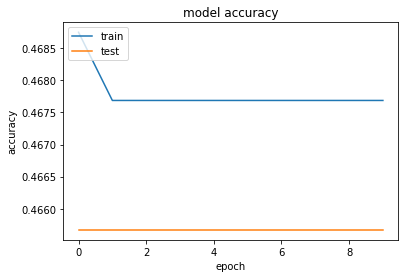

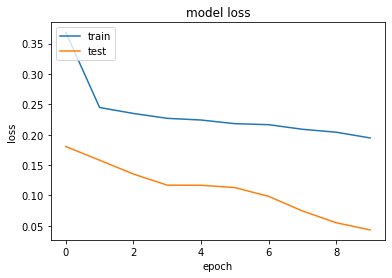

In [21]:
# call the function to fit to the data (training the network)
history= model.fit(X_train, y_train, epochs = bst_eph, batch_size=bst_size, validation_data=(X_test, y_test))

# save the model
#model.save('weights.h5')


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_pred = grid.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.46566961250849764
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       446
           1       0.47      1.00      0.64       685
           2       0.00      0.00      0.00       340

    accuracy                           0.47      1471
   macro avg       0.16      0.33      0.21      1471
weighted avg       0.22      0.47      0.30      1471



Text(0.5, 15.0, 'Predicted label')

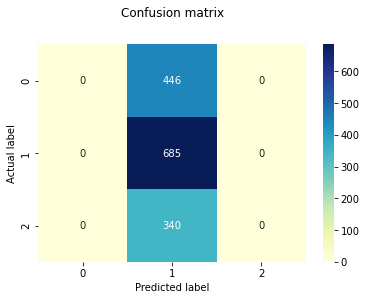

In [24]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [26]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [27]:
print(multiclass_roc_auc_score(y_test, y_pred))

0.5


In [28]:
# store end time
end = time.time()
time_tkn = end-start_time
print('Time taken in hours:',time_tkn/(60*60))
print('Time taken in mins:',time_tkn/(60))

Time taken in hours: 0.9660465429226558
Time taken in mins: 57.962792575359344
